# Data Mining - Assignment 1 (Task 1 - Clustering)

### 1. Load Dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving mall_customers_dataset.csv to mall_customers_dataset.csv


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('mall_customers_dataset.csv', sep=";", skiprows=1, skipinitialspace=True)

In [4]:
data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40
...,...,...,...,...,...
195,196,Female,35,120000,79
196,197,Female,45,126000,28
197,198,Male,32,126000,74
198,199,Male,32,137000,18


### 2. Exploratory Data Analysis

In [5]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income ($)       200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Based on the info we can see that there are 200 rows in the data frame and 5 columns displaying customers, their age, annual income and spending score. Majority of the columns have numerical values which is important for our further analysis. The only feature with categorical data is the column 'Gender', if we are using it encoding is needed.

In [6]:
data.describe(include = 'all')

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60560.000000,50.200000
std,57.879185,NaN,13.969007,26264.721165,25.823522
min,1.000000,NaN,18.000000,15000.000000,1.000000
25%,50.750000,NaN,28.750000,41500.000000,34.750000
50%,100.500000,NaN,36.000000,61500.000000,50.000000
75%,150.250000,NaN,49.000000,78000.000000,73.000000


Based on these values we can see that the Annual Income is displayed in the actual amount of \$, for ensuring a correct analysis and good display of plots it makes sense to change the unit to k\$ later on in the preprocessing.

In [7]:
duplicated_rows = data[data.duplicated(keep=False)]
print(f'Number of duplicated rows: {len(duplicated_rows)}')

Number of duplicated rows: 0


There are no duplicated rows in this dataframe, until now no rows have to be removed.

In [8]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)'],
      dtype='object')

To improve the usability of these columns it makes sense to change the column names to names that do not contain spaces. This is done with the next line of code.

In [9]:
data.rename(columns = {'Annual Income ($)':'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore'}, inplace = True)

In [10]:
data

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40
...,...,...,...,...,...
195,196,Female,35,120000,79
196,197,Female,45,126000,28
197,198,Male,32,126000,74
198,199,Male,32,137000,18


To gain more insight about the different features we will visualize them using distribution plots and coloring them based on the only categorical value 'Gender'.

In [11]:
import seaborn as sns

In [12]:
import matplotlib.pyplot as plt

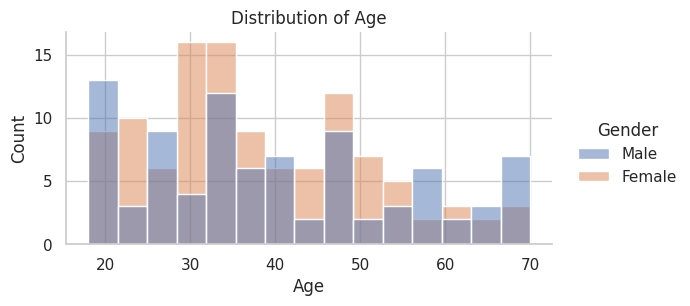

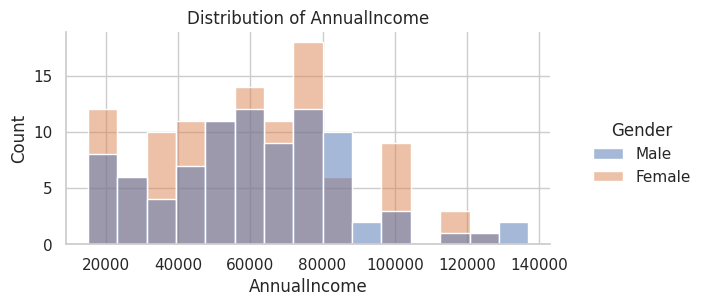

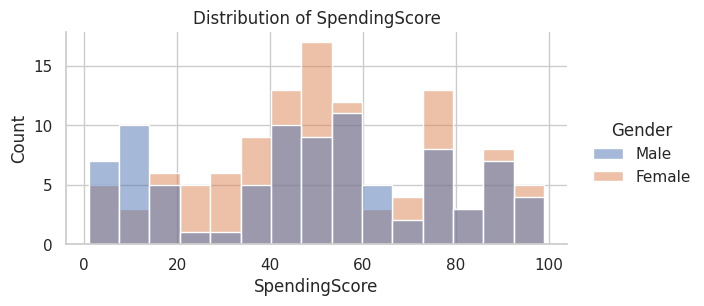

In [13]:
sns.set(style = 'whitegrid')
columns = ['Age', 'AnnualIncome', 'SpendingScore']
for c in columns:
    sns.displot(data = data, x = c, hue = 'Gender', discrete = False, bins = 15, height = 3, aspect = 2)
    plt.title(f'Distribution of {c}')

From these distribution plots we can get the following insights:

*  **Age:** Younger females dominate the younger age distribution, and males are more prevalent in older age groups.
*  **Annual Income:** Income distribution shows a balanced spread between genders.
*  **Spending Score:** Females are more likely to have higher spending scores, indicating they may be the primary consumers or exhibit higher purchasing behavior compared to males.

The main customer seems to be female since the count of females is higher for majority of the values.

### 3. Data Preprocessing

In [14]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


Since there are no missing values in this dataframe we do not need to remove rows. Now we can take a closer look at the numerical data.

In [15]:
columns = ['Age', 'AnnualIncome', 'SpendingScore']
summary = {}
for c in columns:
    summary[c] = {
        'Mean': data[c].mean(),
        'Median': data[c].median(),
        'Quantiles': data[c].quantile([0.25, 0.5, 0.75]).to_dict()}

In [16]:
summary = pd.DataFrame(summary).T
print(summary)

                  Mean   Median                                     Quantiles
Age              38.85     36.0          {0.25: 28.75, 0.5: 36.0, 0.75: 49.0}
AnnualIncome   60560.0  61500.0  {0.25: 41500.0, 0.5: 61500.0, 0.75: 78000.0}
SpendingScore     50.2     50.0          {0.25: 34.75, 0.5: 50.0, 0.75: 73.0}


As we can see age and spending score have very similar dimensions but the numerical values for annual income are way higher. In order to ensure a correct analysis we need to normalize the annual income by dividing it through 1000. After this is done we can look at the boxplots of every variable to identify potential outliers.

In [17]:
data['AnnualIncome']=data['AnnualIncome']/1000

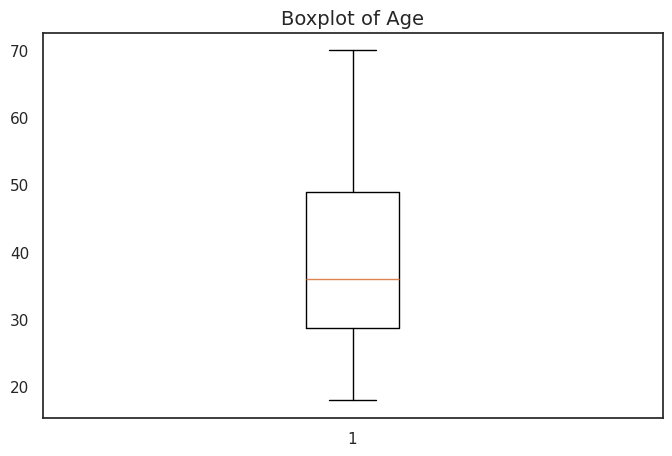

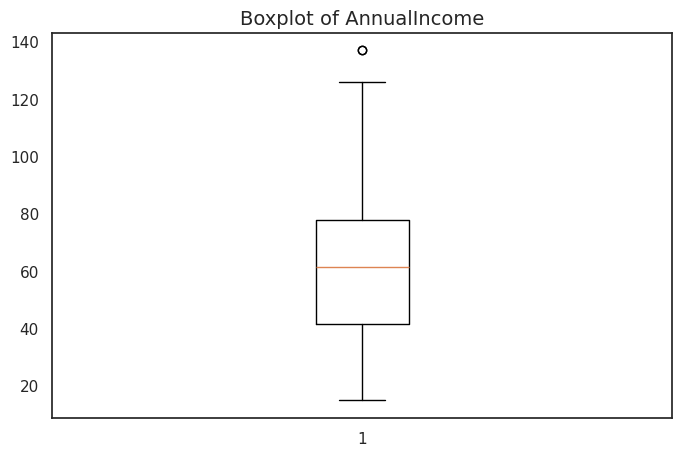

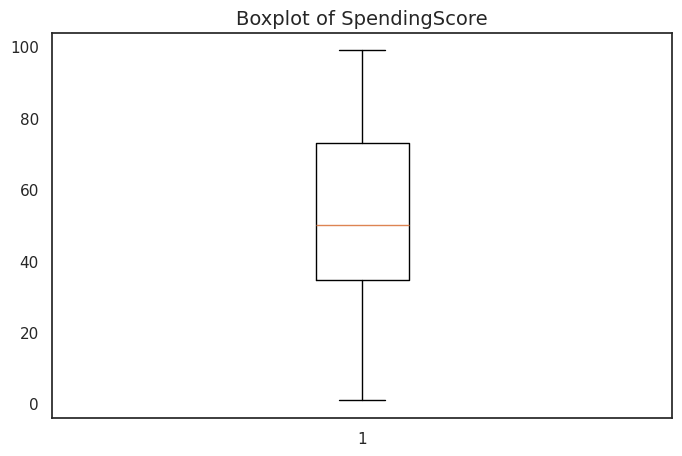

In [18]:
sns.set(style = 'white')
columns = ['Age', 'AnnualIncome', 'SpendingScore']
for c in columns:
  plt.figure(figsize=(8, 5))
  plt.boxplot(data[c])
  plt.title(f'Boxplot of {c}', fontsize=14)
  plt.show()

The boxplots show outliers in the annual income for an annual income of around 140 000 \$. In the next step we will identify these to see how many rows are outliers.

In [19]:
outliers_index = set()
Q1 = data['AnnualIncome'].quantile(0.25)
Q3 = data['AnnualIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['AnnualIncome'] < lower_bound) | (data['AnnualIncome'] > upper_bound)]
outliers_index.update(outliers.index)

print(outliers_index)

{198, 199}


Since the outliers are just two rows of 200 and therefor are 1% of the complete data they can be removed to ensure a better analysis.

In [20]:
data = data.drop(outliers_index)

In [21]:
data

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15.0,39
1,2,Male,21,15.0,81
2,3,Female,20,16.0,6
3,4,Female,23,16.0,77
4,5,Female,31,17.0,40
...,...,...,...,...,...
193,194,Female,38,113.0,91
194,195,Female,47,120.0,16
195,196,Female,35,120.0,79
196,197,Female,45,126.0,28


### 4. Application of different Clustering Algorithms

In [22]:
import numpy as np
from numpy import unique
from numpy import where

In [23]:
data_algorithms = data.copy()

We drop the columns CustomerID, Age and Gender since grouping people based on annual data and spending score makes more sense. From the plots in the EDA we already got valuable insights for the gender, which can be used for marketing purposes. Spending Score and Annual Income have more influence on each other which is why we are choosing those two variables and leave the age.

In [24]:
data_algorithms.drop(columns = ['Gender', 'Age', 'CustomerID'], axis=1, inplace=True)

In [25]:
data_algorithms.head()

,AnnualIncome,SpendingScore
0,15.0,39
1,15.0,81
2,16.0,6
3,16.0,77
4,17.0,40


To use the data for the Gaussian Mixture Model and the DSCAN we need to transform it to an array, which is done using the code below.

In [26]:
data_X = data_algorithms.iloc[:,[0,1]].values

#### 4.1 K-Means

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

At first we try the KMeans algorithm with 2 clusters to take a close look at the data and get the first insights.

In [28]:
kmeans = KMeans(n_clusters=2, random_state = 42)
kmeans.fit(data_algorithms)

KMeans(n_clusters=2, random_state=42)

In [29]:
centers = kmeans.cluster_centers_
centers

array([[53.10191083, 42.42038217],
       [85.3902439 , 79.97560976]])

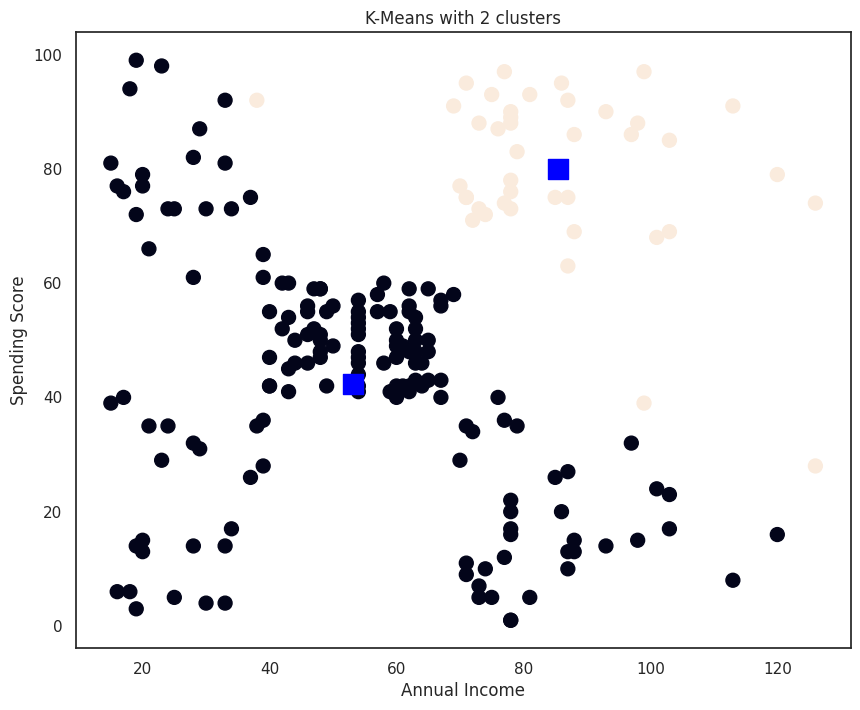

In [30]:
plt.figure(figsize=(10, 8))

plt.scatter(data_algorithms['AnnualIncome'],
            data_algorithms['SpendingScore'],
            c=kmeans.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 2 clusters')

plt.show()

The KMeans algorithm groups the the data in one group with high spending score and high annual income. The rest is grouped together as well. Next we will compute the silhouette score to see how well the model performs.

In [31]:
score_kmeans = silhouette_score (data_algorithms, kmeans.labels_)
print("Score = ", score_kmeans)

Score =  0.3871155777204612


This score is low which indicates a bad clustering, therefor we will use the elbow plot to find the perfect number of clusters to use for this data. The elbow plot plots the inertia (within-cluster sum of squared distances) or against the number of clusters. The "elbow point," where the plot bends or flattens, is the optimal k.

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

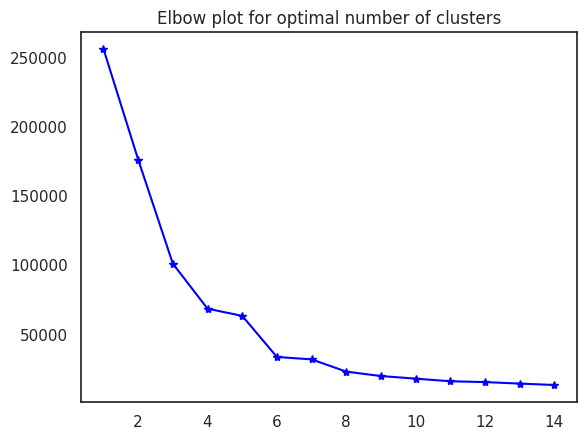

In [32]:
wscc = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=42)
    kmeans.fit(data_algorithms)
    wscc.append(kmeans.inertia_)

plt.plot(range(1,15),wscc,marker="*",c="blue")
plt.title("Elbow plot for optimal number of clusters")

Based on this plot we can interpret that 6 clusters would give us a good result.

In [33]:
kmeans = KMeans(n_clusters=6, random_state = 42)
kmeans.fit(data_algorithms)

KMeans(n_clusters=6, random_state=42)

In [34]:
centers = kmeans.cluster_centers_
centers

array([[ 55.0875    ,  49.7125    ],
       [105.3       ,  82.7       ],
       [ 25.72727273,  79.36363636],
       [ 86.34285714,  17.57142857],
       [ 78.03571429,  81.89285714],
       [ 26.30434783,  20.91304348]])

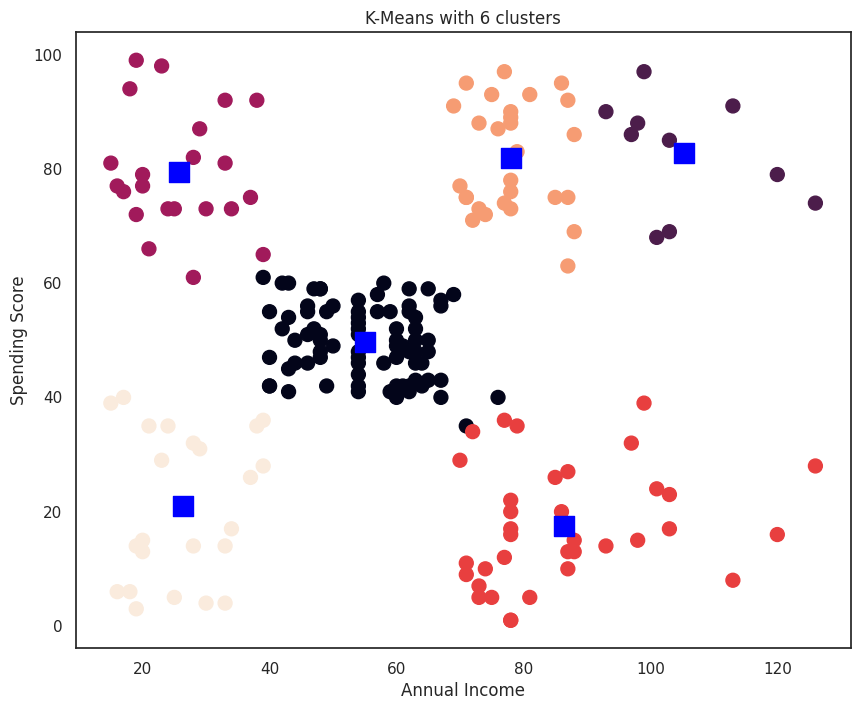

In [35]:
plt.figure(figsize=(10, 8))

plt.scatter(data_algorithms['AnnualIncome'],
            data_algorithms['SpendingScore'],
            c=kmeans.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 6 clusters')

plt.show()

Based on this plot we can identify 6 clusters it is very interesting to see that there are two extremes for the high and low annual income customers people tend to have either a high or low spending score. People with an average annual income of 40k - 70k tend to have an average spending score and do not go in extremes.

#### 4.2 Gaussian Mixture Model

In [36]:
from sklearn.mixture import GaussianMixture

For the Gaussian Mixture Model we are using the Bayesian Information Criterion. The BIC Plot is used to evaluate the best number of components (clusters). It is based on a balance between model fit and complexity. The number of clusters (k) where the BIC value is minimized is considered the optimal number of clusters.

Text(0.5, 1.0, 'BIC plot for optimal number of components')

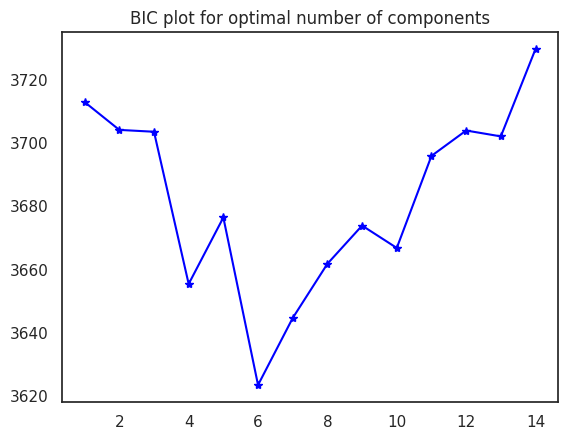

In [37]:
find_best = []
for i in range(1,15):
    model_gb = GaussianMixture(n_components=i, random_state=42)
    model_gb.fit(data_X)
    find_best.append(model_gb.bic(data_X))

plt.plot(range(1,15),find_best,marker="*",c="blue")
plt.title("BIC plot for optimal number of components")

Based on this plot we can interpret that 6 clusters woud give us a good result.

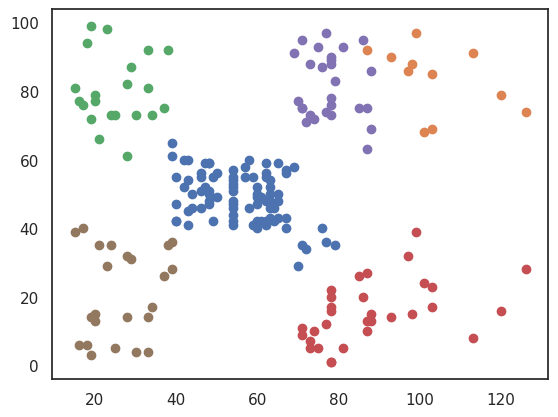

In [38]:
model_gb = GaussianMixture(n_components=6, random_state = 42)
model_gb.fit(data_X)

yhat_gb = model_gb.predict(data_X)
clusters_gb = unique(yhat_gb)

for cluster in clusters_gb:
	row_ix = where(yhat_gb == cluster)
	plt.scatter(data_X[row_ix, 0], data_X[row_ix, 1])

plt.show()

It is interesting to see that this model displays almost the same 6 clusters as the KMeans algorithm. There seems to be a clear grouping in the data.

#### 4.3 Mean Shift

In [39]:
from sklearn.cluster import MeanShift

The elbow plot can also be adapted to find the optimal bandwidth parameter for Mean Shift clustering. Look for the "elbow point" in the plot, where the decrease in inertia slows down significantly.

Text(0.5, 1.0, 'Elbow plot for optimal number of bandwidth')

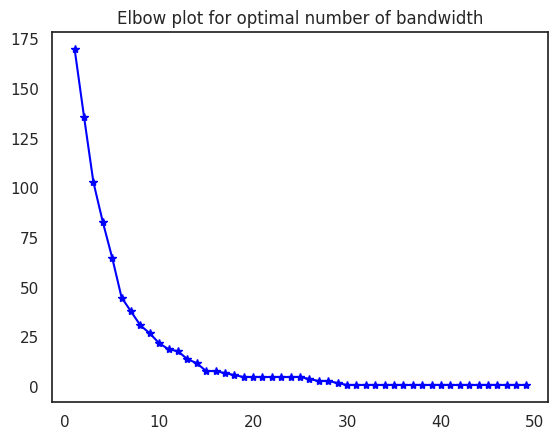

In [40]:
cluster_counts = []
for i in range(1, 50):
  mean_shift = MeanShift(bandwidth=i)
  labels = mean_shift.fit_predict(data_algorithms)
  cluster_counts.append(len(set(labels)))

plt.plot(range(1,50),cluster_counts,marker="*",c="blue")
plt.title("Elbow plot for optimal number of bandwidth")

Based on this plot we can see that a bandwidth of 15 is giving us the best results.

In [41]:
model_ms = MeanShift(bandwidth=15)
model_ms.fit(data_algorithms)

yhat_ms = model_ms.predict(data_algorithms)
clusters_ms = unique(yhat_ms)
labels_ms = model_ms.labels_
centroids_ms = model_ms.cluster_centers_

In [42]:
centroids_ms

array([[ 56.        ,  49.79710145],
       [ 77.30769231,  83.11538462],
       [ 79.85714286,  12.        ],
       [ 24.75      ,  75.375     ],
       [ 31.08333333,  27.66666667],
       [ 24.58333333,   9.58333333],
       [119.66666667,  81.33333333],
       [119.66666667,  17.33333333]])

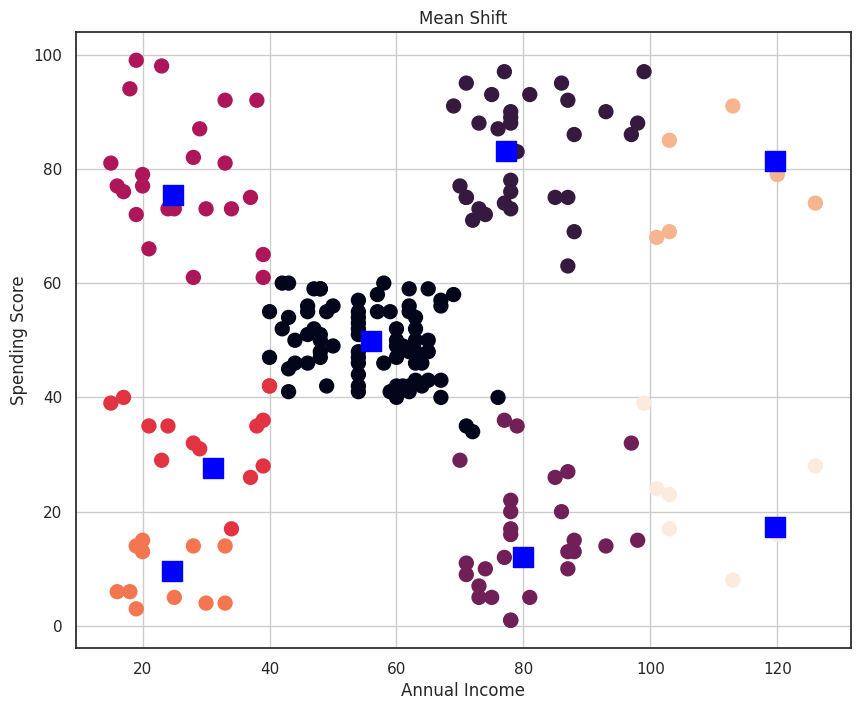

In [43]:
plt.figure(figsize=(10, 8))

plt.scatter(data_algorithms['AnnualIncome'],
            data_algorithms['SpendingScore'],
            c=labels_ms, s=100)

plt.scatter(centroids_ms[:,0], centroids_ms[:,1], color='blue', marker='s', s=200)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Mean Shift')
plt.grid()
plt.show()

There are 8 clusters in this plot. The extremes are divided into even smaller clusters compared to the KMeans and Gaussian Mixture Model algorithems.

#### 4.4 DBSCAN

In [44]:
from sklearn.cluster import DBSCAN

For the DBSCAN we can determine the optimal epsilon using the silhouette score.

In [45]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def find_best_eps(data, eps_values, min_samples=3):
    best_eps = None
    best_score = -1
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)
        if len(set(labels)) > 1:
            score = silhouette_score(data, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
    return best_eps, best_score

eps_values = np.linspace(0.1, 2.0, 50)
best_eps, best_score = find_best_eps(data_X, eps_values)

print(f"Best epsilon: {best_eps}, Best Silhouette Score: {best_score}")

Best epsilon: 2.0, Best Silhouette Score: -0.2916895407123298


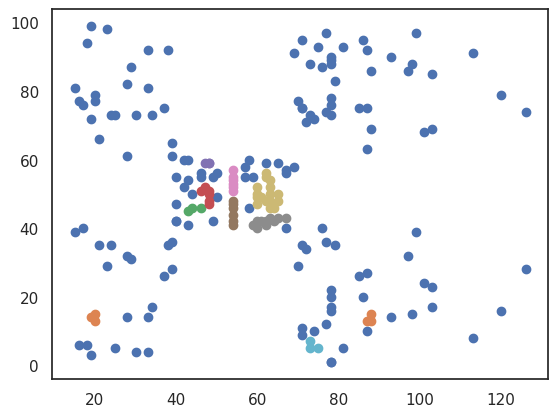

In [46]:
model = DBSCAN(eps=2.0, min_samples=3)

yhat_DBSCAN = model.fit_predict(data_X)

clusters = unique(yhat_DBSCAN)

for cluster in clusters:
	row_ix = where(yhat_DBSCAN == cluster)
	plt.scatter(data_X[row_ix, 0], data_X[row_ix, 1])

plt.show()

Based on the plot we can see that the clustering with this algorithem does not work for this dataset.

### 5. Evaluation of the different Algorithms

The algorithems are evaluated based on the silhouette score. It measures how similar a data point is to its own cluster compared to other clusters, providing insight into how well the clusters are separated and how compact they are.

In [47]:
score_kmeans = silhouette_score (data_algorithms, kmeans.labels_)
print("Kmeans Score = ", score_kmeans)

score_GMM = silhouette_score (data_X, yhat_gb)
print("Gaussian Mixture Score = ", score_GMM)

score_MS = silhouette_score(data_algorithms, yhat_ms)
print("Mean Shift Score = ", score_MS)

score_DBSCAN = silhouette_score(data_X, yhat_DBSCAN)
print("DBSCAN Score = ", score_DBSCAN)

Kmeans Score =  0.540179791500928
Gaussian Mixture Score =  0.5319018022116573
Mean Shift Score =  0.4940218321259348
DBSCAN Score =  -0.2916895407123298


Based on the silhouette score we can see that the Kmeans algorithem performs the best but non of them performs incredibly good. This cab be due to the small size of the data frame.

### 6. Strengths and weaknesses of the algorithms

#### 6.1 K-means

*  Strengths:
  *  Performed the best among all algorithms, according to the highest silhouette score.
  *  Works well for relatively small datasets

*  Weaknesses:
  *  Poor performance with clusters of varying densities or non-spherical shapes.

#### 6.2 Gaussian Mixture Model

*  Strengths:
  *  Similar performance to K-Means, indicating the dataset might align well with elliptical clusters.
  *  Can capture data points that don’t fit neatly into one cluster.

*  Weaknesses:
  *  If the dataset doesn’t follow Gaussian patterns, it may not perform well.
  *  Can struggle with overlapping clusters.

#### 6.3 Mean Shift

*  Strengths:
  *  Does not require specifying the number of clusters upfront; adapts to the natural density of the data.
  *  Suitable for non-linear or irregularly shaped clusters.
*  Weaknesses:
  *  Lower silhouette score suggests it struggles with this dataset, likely due to the uniform spread of Spending Score and Income values. The dataset lacks dense regions for clustering.
  *  Computationally intensive for larger datasets.

#### 6.4 DBSCAN

*  Strengths:
  *  Can handle noise well, making it suitable for datasets with outliers, which were removed in the preprocessing.
  *  Does not require a predetermined number of clusters.
*  Weaknesses:
  *  Negative silhouette score indicates it performed poorly. Likely, the dataset has overlapping clusters that DBSCAN cannot separate effectively.

### 7. Discussion and propsal for potential applications or further steps

Discussion:
*  K-Means and GMM performed well, likely because the data fits well with spherical or elliptical clusters.
*  Mean Shift struggled due to the lack of dense regions, and DBSCAN failed due to the overlapping nature and absence of strong density-based clusters.

Application:
* Use the clustering results to identify customer groups, such as high-income/high-spending customers for premium marketing campaigns or low-income/high-spending groups for budget-friendly promotions.

Further steps:
*  Use domain knowledge to validate the clusters, ensuring they align with meaningful business insights.
*  Include demographic data such as age, gender, or location to get more information about different customer groups.
